# Importing the essential libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1 - Load Dataset

In [6]:
# Using the Heart Disease Dataset from Kaggle
# data_url = "https://raw.githubusercontent.com/plotly/datasets/master/heart.csv"
heart_df = pd.read_csv("heart.csv")

print("Dataset Loaded Successfully!\n")
print("First 5 rows:\n", heart_df.head())
print("\nShape of Data:", heart_df.shape)

Dataset Loaded Successfully!

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Shape of Data: (1025, 14)


# Step 2 - Split the data

In [7]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=45
)
print("\nData Split Completed (Train:", X_train.shape, "Test:", X_test.shape, ")")


Data Split Completed (Train: (768, 13) Test: (257, 13) )


# Step 3 - Train Decision Tree

In [8]:
tree_model = DecisionTreeClassifier(random_state=45)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"\nDecision Tree Accuracy: {tree_acc:.3f}")



Decision Tree Accuracy: 1.000


# Step 4 - Visualize the Decision Tree

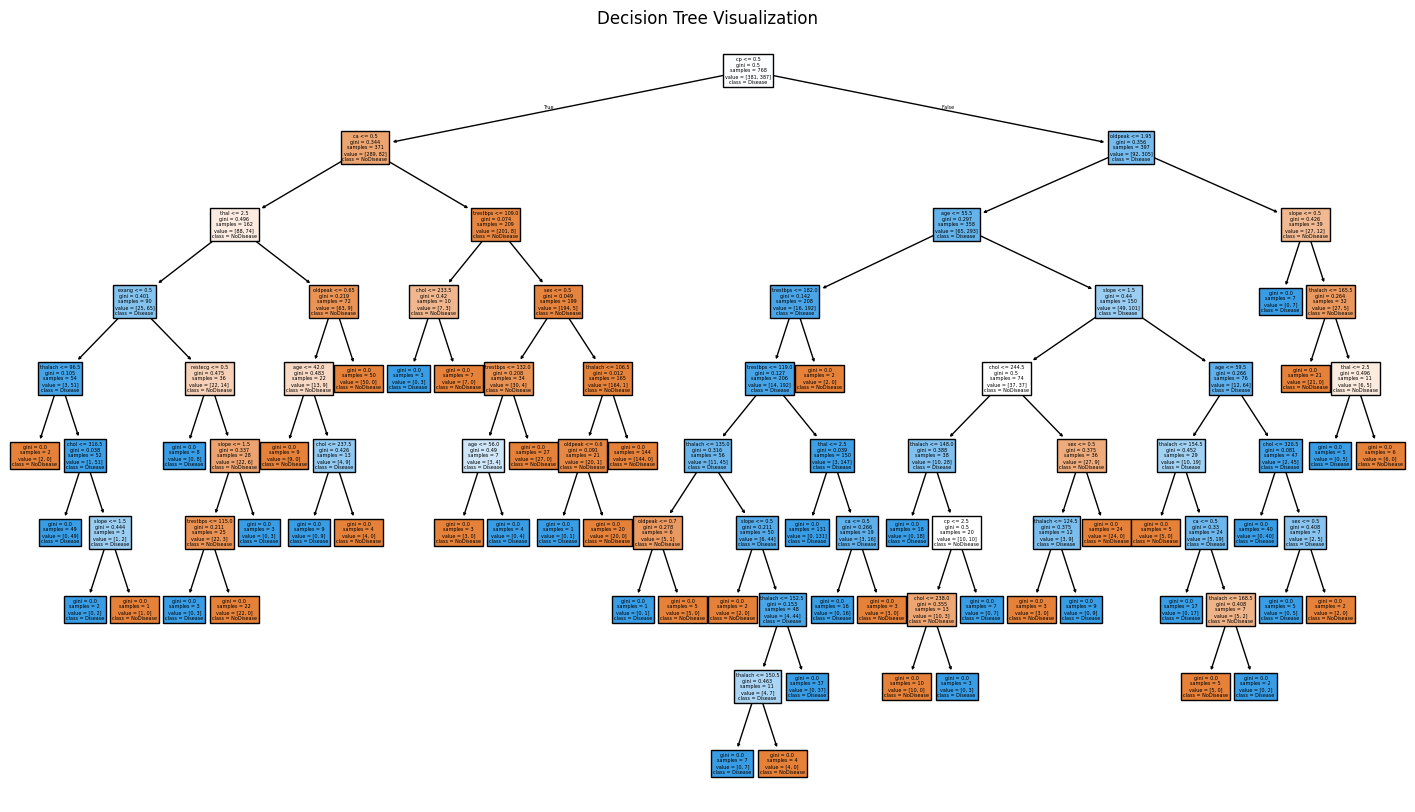

In [9]:
plt.figure(figsize=(18, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['NoDisease','Disease'])
plt.title("Decision Tree Visualization")
plt.show()

# Step 5 - Control Tree Depth to Avoid Overfitting

In [10]:
depth_controlled_tree = DecisionTreeClassifier(max_depth=4, random_state=45)
depth_controlled_tree.fit(X_train, y_train)
y_pred_control = depth_controlled_tree.predict(X_test)
depth_acc = accuracy_score(y_test, y_pred_control)
print(f"\nDepth-Controlled Tree Accuracy (max_depth=4): {depth_acc:.3f}")


Depth-Controlled Tree Accuracy (max_depth=4): 0.817


# Step 6 - Train Random Forest

In [11]:
forest_model = RandomForestClassifier(n_estimators=150, random_state=45)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
forest_acc = accuracy_score(y_test, y_pred_forest)
print(f"\nRandom Forest Accuracy: {forest_acc:.3f}")


Random Forest Accuracy: 1.000


# Step 7 - Feature Importance

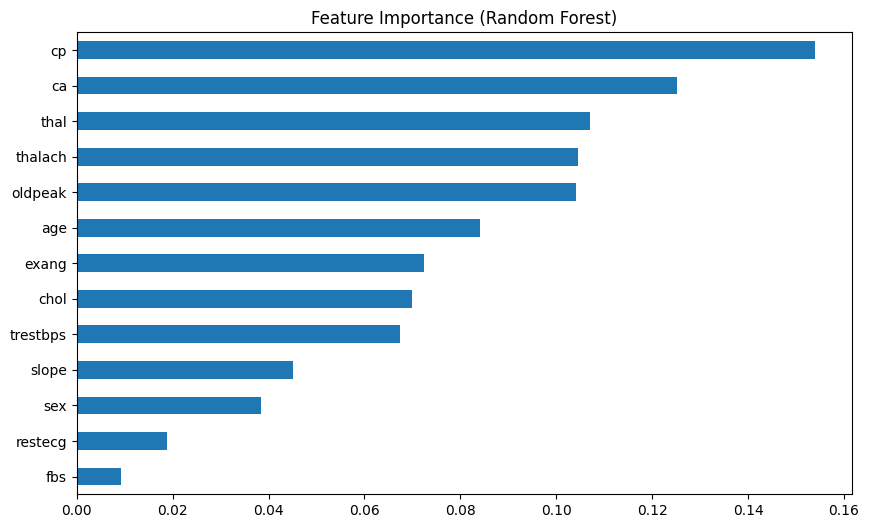

In [12]:
importances = pd.Series(forest_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

# Step 8 - Cross Validation

In [13]:
cv_scores = cross_val_score(forest_model, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores).round(3))


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.997


# Step 9 - Comparison Report

In [14]:
print("\nFinal Model Comparison:")
print(f"Decision Tree: {tree_acc:.3f}")
print(f"Depth Controlled Tree: {depth_acc:.3f}")
print(f"Random Forest: {forest_acc:.3f}")


Final Model Comparison:
Decision Tree: 1.000
Depth Controlled Tree: 0.817
Random Forest: 1.000


# Detailed Classification Report

In [15]:
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_forest))


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       139

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

